In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('Cleaned-data.csv')

In [5]:
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [6]:
data.dropna(inplace=True)

In [7]:
data.drop_duplicates(inplace=True)
data

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [8]:
import seaborn as sns

In [9]:
data1=data.drop(['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe' ],axis=1) 
data1.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,China


In [10]:
data1=data1.drop(['Country'],axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(data1)

# Data Visualization

<AxesSubplot:xlabel='Severity_None', ylabel='count'>

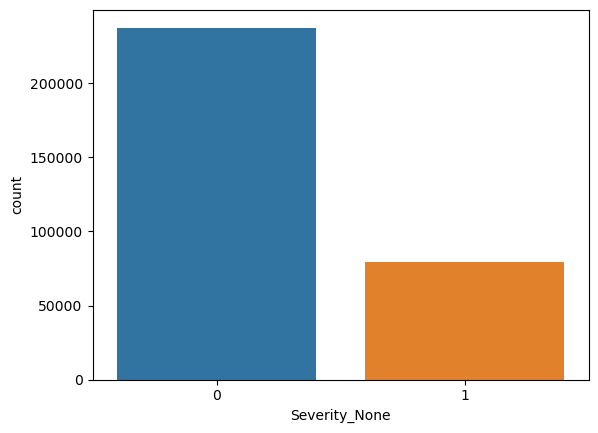

In [12]:
sns.countplot(x=data['Severity_None'])

In [13]:
indicators =[]
indicators2 =[]
target_column=[]
severity= []

indicators = ['Fever', 'Tiredness', 'Dry-Cough',  'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion',
              'Runny-Nose', 'Diarrhea', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Male',
              'Gender_Female', 'Gender_Transgender']
target_columns = ['Severity_None']
indicators2 = ['Fever', 'Tiredness', 'Dry-Cough',  'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion',
              'Runny-Nose', 'Diarrhea', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Male',
              'Gender_Female', 'Gender_Transgender', 'Severity_None']
severity=['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe']
risk=data[severity]
features = data[indicators]
targets = data[target_columns]
display(features.head(), targets.head())

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Male,Gender_Female,Gender_Transgender
0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
3,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
4,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0


,Severity_None
0,0
1,0
2,0
3,0
4,0


<AxesSubplot:xlabel='Occurence_Count', ylabel='Indicator'>

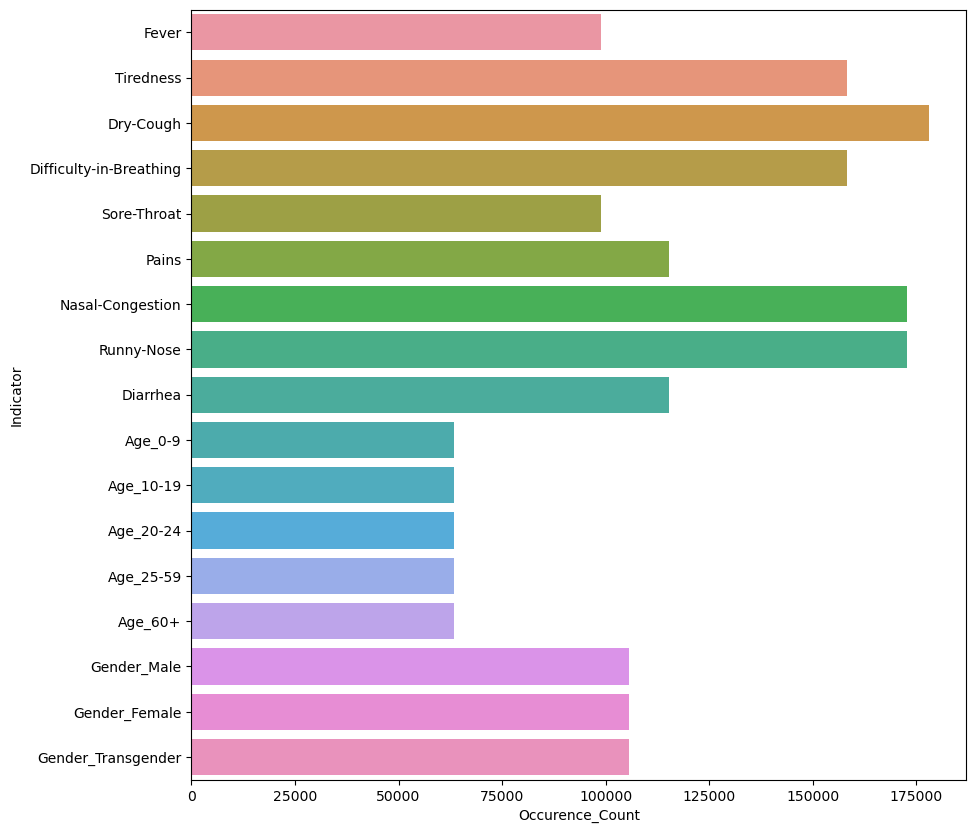

In [14]:
plt.figure(figsize = (10 ,10))
temp = []
for i in indicators:
    temp.append(sum(features[i].values))
temp_df = pd.DataFrame({"Indicator":indicators, "Occurence_Count":temp})
sns.barplot(data = temp_df, y="Indicator", x="Occurence_Count")

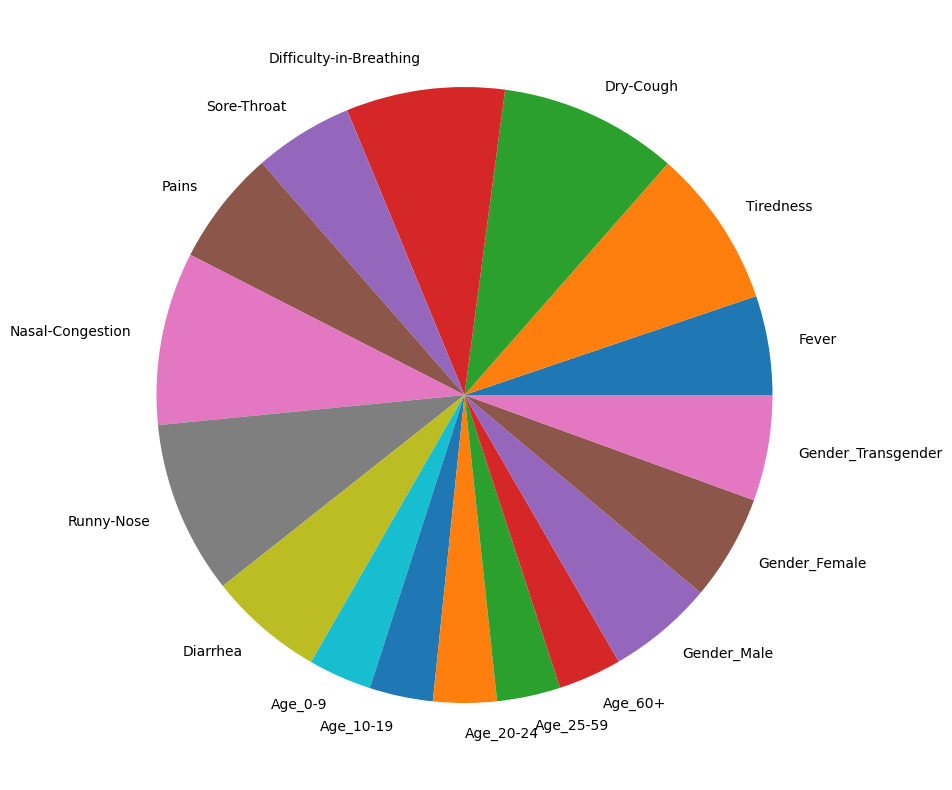

In [15]:
plt.figure(figsize = (10 ,10))
plt.pie(data=temp_df, x="Occurence_Count", labels=temp_df["Indicator"])
plt.show()

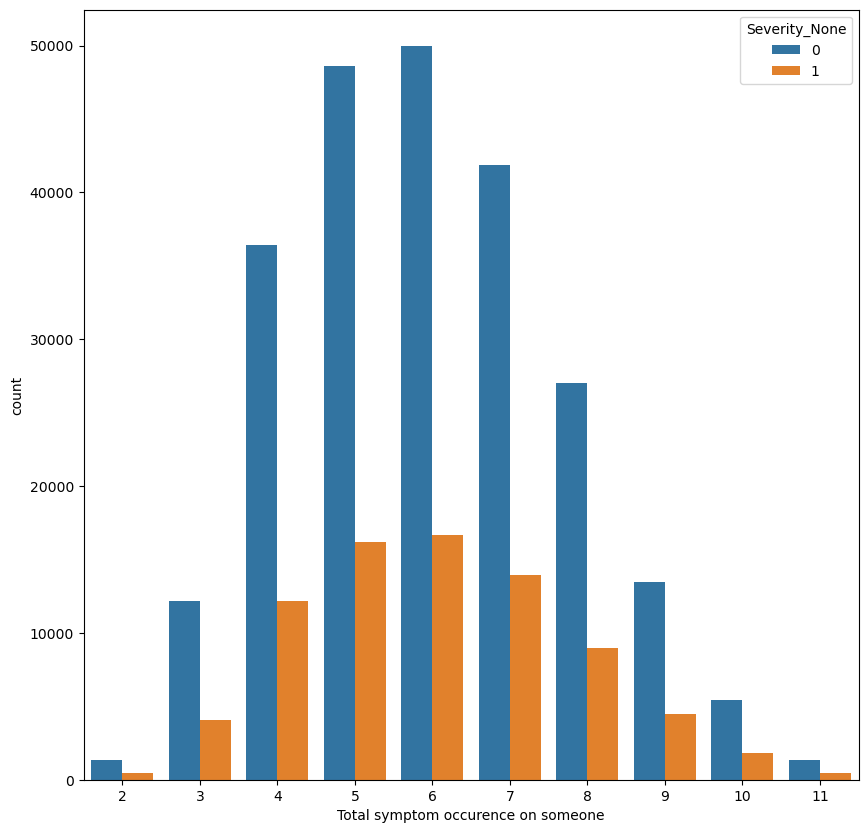

In [18]:
plt.figure(figsize = (10 ,10))
sns.countplot(data=feats, x='Total_Symptom', hue='Severity_None')
plt.xlabel("Total symptom occurence on someone")
plt.show()

# PCA

In [19]:
pca = PCA(2)
pca

PCA(n_components=2)

In [20]:
df = pca.fit_transform(train_df_scaled)
df = pd.DataFrame(df)
df.columns = ['P1','P2']
print(df.head())

         P1        P2
0 -2.108836 -1.804854
1 -2.114649 -1.794774
2 -2.079965 -1.853949
3 -2.108836 -1.804854
4 -2.114649 -1.794774


# Determine Value of K for K means

# Elbow Method

In [21]:
inertias = []
for i in range(1,15):
    km = KMeans(n_clusters=i,random_state=2)
    km.fit(train_df_scaled)
    inertias.append(km.inertia_)

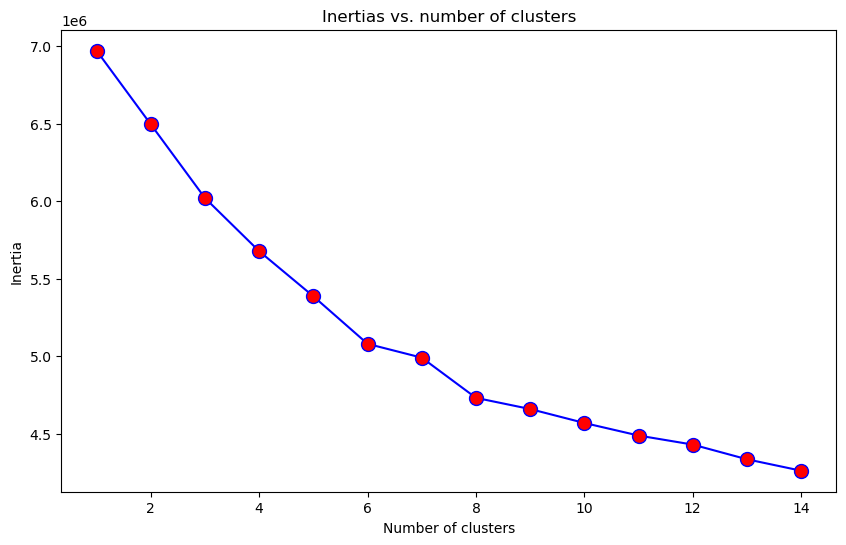

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15), inertias, color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title('Inertias vs. number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# K-Means

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
label = kmeans.fit_predict(df)
print(label)

[6 6 6 ... 4 4 4]


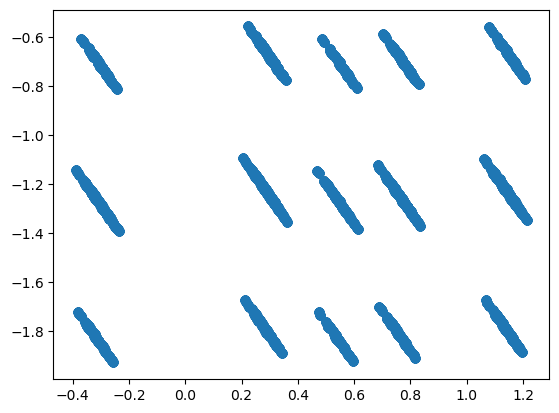

In [24]:
import matplotlib.pyplot as plt
 
filtered_label0 = df[label == 0]
plt.scatter(filtered_label0['P1'] , filtered_label0['P2'])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


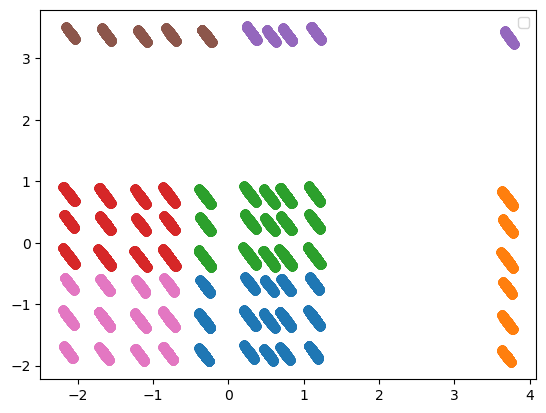

In [25]:
u_labels = np.unique(label)
 
#plotting the results:
filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]
filtered_label3 = df[label == 3]
filtered_label4 = df[label == 4]
filtered_label5 = df[label == 5]
filtered_label6 = df[label == 6]


plt.scatter(filtered_label0['P1'] , filtered_label0['P2'])
plt.scatter(filtered_label1['P1'] , filtered_label1['P2'])
plt.scatter(filtered_label2['P1'] , filtered_label2['P2'])
plt.scatter(filtered_label3['P1'] , filtered_label3['P2'])
plt.scatter(filtered_label4['P1'] , filtered_label4['P2'])
plt.scatter(filtered_label5['P1'] , filtered_label5['P2'])
plt.scatter(filtered_label6['P1'] , filtered_label6['P2'])


plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


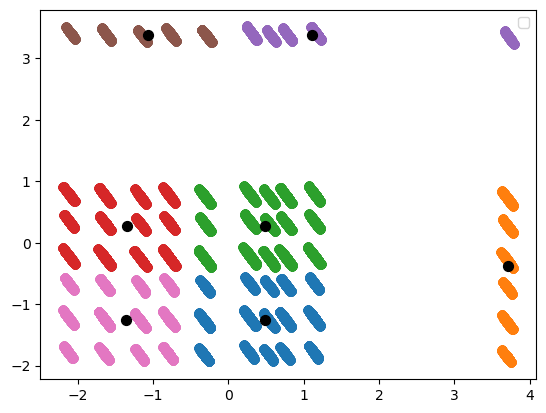

In [27]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:

filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]
filtered_label3 = df[label == 3]
filtered_label4 = df[label == 4]
filtered_label5 = df[label == 5]
filtered_label6 = df[label == 6]


plt.scatter(filtered_label0['P1'] , filtered_label0['P2'])
plt.scatter(filtered_label1['P1'] , filtered_label1['P2'])
plt.scatter(filtered_label2['P1'] , filtered_label2['P2'])
plt.scatter(filtered_label3['P1'] , filtered_label3['P2'])
plt.scatter(filtered_label4['P1'] , filtered_label4['P2'])
plt.scatter(filtered_label5['P1'] , filtered_label5['P2'])
plt.scatter(filtered_label6['P1'] , filtered_label6['P2'])

plt.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')
plt.legend()
plt.show()

<AxesSubplot:>

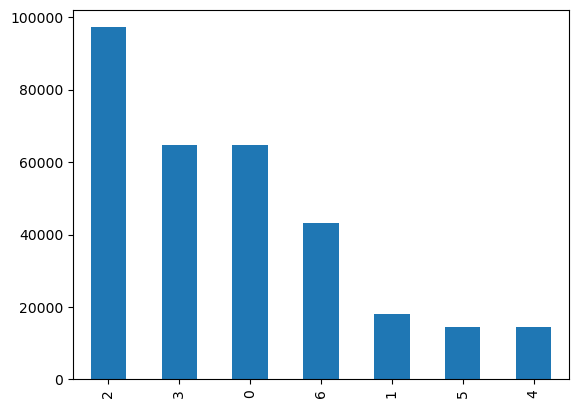

In [28]:
resultDfk = pd.DataFrame(label)
resultDfk.iloc[:,0].value_counts().plot.bar()

In [29]:
datas=data.sample(n=25000)
datas=datas.drop(['Country'],axis=1)

In [30]:
code = []

for i in range(datas.shape[0]):
    if (datas.iloc[i]['Severity_Mild']==1):
      
        code.append(1)
    elif (datas.iloc[i]['Severity_Moderate']==1):
 
        code.append(2)
    elif (datas.iloc[i]['Severity_Severe']==1):
   
        code.append(3)
    elif (datas.iloc[i]['Severity_None']==1):
   
        code.append(4)
    else:
        poke_type.append('NaN')
        code.append('NaN')

In [31]:
datas['code'] = code

<AxesSubplot:xlabel='code', ylabel='count'>

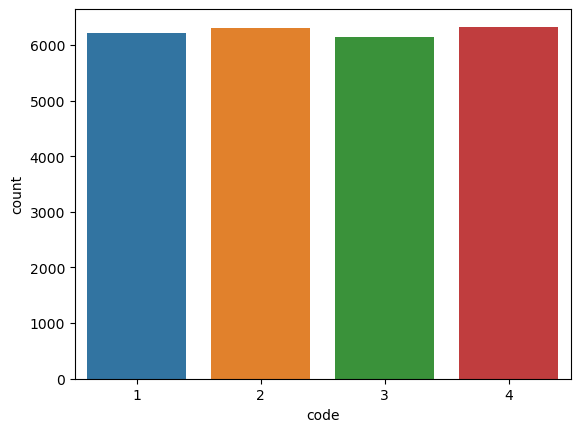

In [32]:
sns.countplot(x=datas['code'])

<AxesSubplot:>

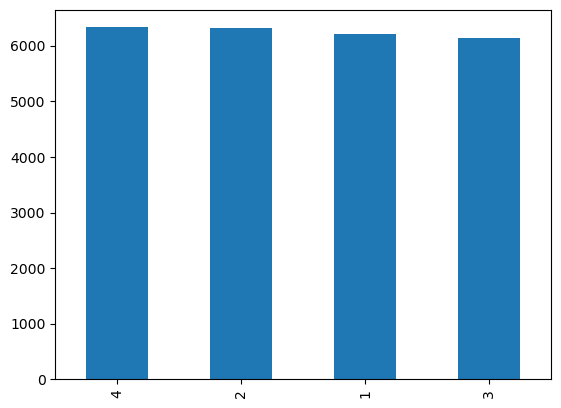

In [33]:
datas['code'].value_counts().plot.bar()

In [34]:
datas1=datas.drop(['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe' ],axis=1) 
datas1.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,code
39170,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
285547,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,3
34176,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
167623,0,1,1,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,3
84847,1,1,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,3


# DBSCAN

In [35]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [36]:
pca_db = PCA(2)
pca_db

PCA(n_components=2)

In [37]:
df_db = pca_db.fit_transform(datas1)
df_db.shape

(25000, 2)

In [38]:
db = DBSCAN(eps=0.3, min_samples=5).fit(df_db)
core_samples_mask =  np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [39]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 0


In [40]:
resultDfd = pd.DataFrame(db.labels_)
resultDfd.iloc[:,0].value_counts()


3    6328
2    6314
0    6215
1    6143
Name: 0, dtype: int64

<AxesSubplot:title={'center':'DBSCAN clustering'}>

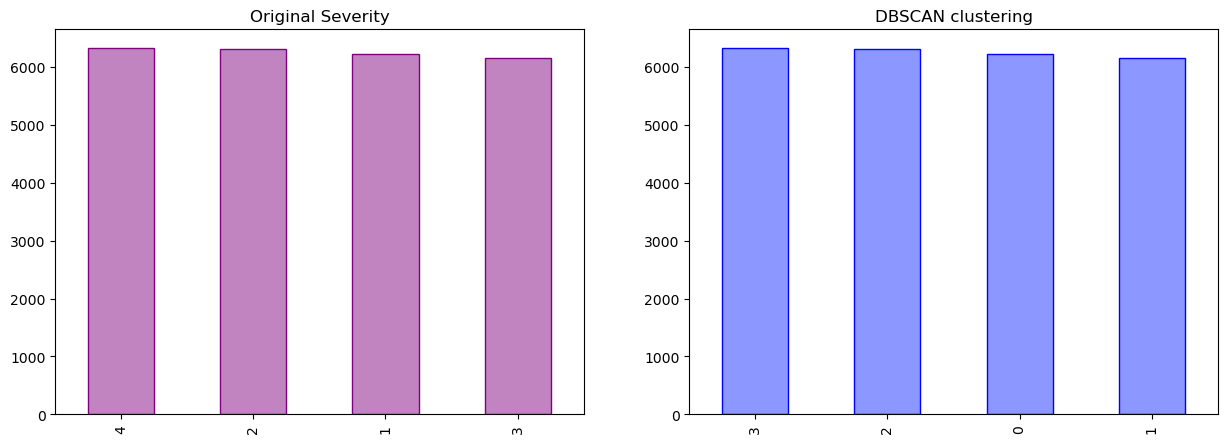

In [41]:
fig,ax = plt.subplots(1, 2, figsize=(15, 5))
ax=plt.subplot(1,2,1)
datas['code'].value_counts().plot.bar(title="Original Severity",color=(0.6, 0.2, 0.6, 0.6),  edgecolor='purple')
ax=plt.subplot(1,2,2)
resultDfd.iloc[:,0].value_counts().plot.bar(title="DBSCAN clustering",color=(0.1, 0.2, 1, 0.5),  edgecolor='blue')

# Result of all Clusters

<AxesSubplot:title={'center':'DBSCAN clustering'}>

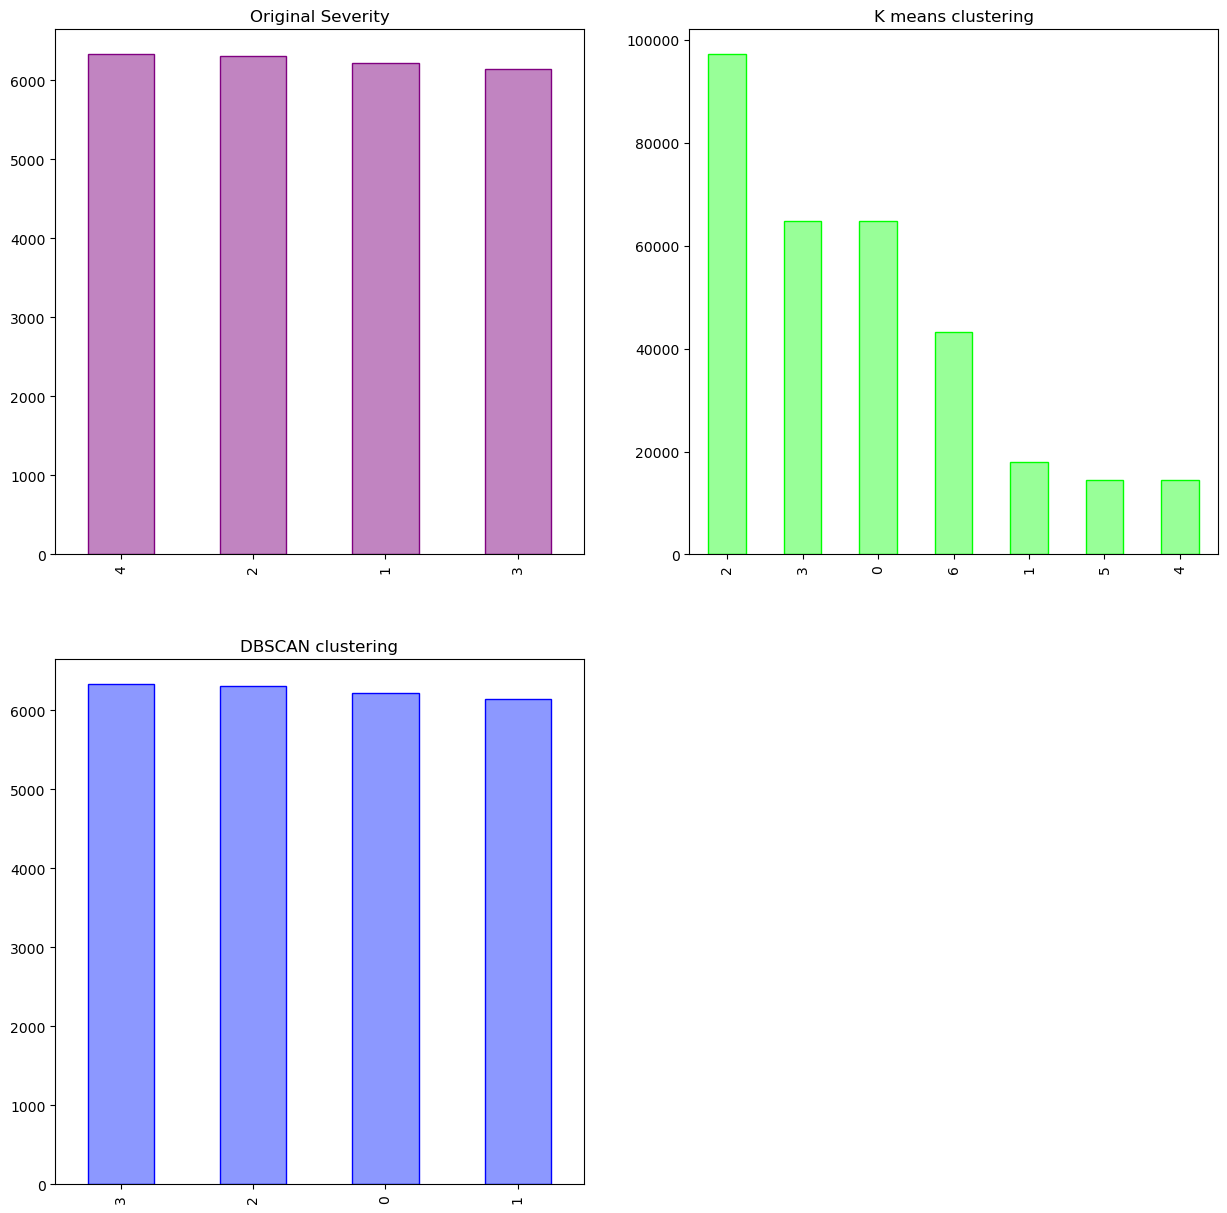

In [44]:
fig, ax = plt.subplots(1,3, figsize=(15, 15))
ax=plt.subplot(2,2,1)
datas['code'].value_counts().plot.bar(title="Original Severity",color=(0.6, 0.2, 0.6, 0.6),  edgecolor='purple')
ax=plt.subplot(2,2,2)
resultDfk.iloc[:,0].value_counts().plot.bar(title="K means clustering",color=(0.2, 1, 0.2, 0.5),  edgecolor='lime')

ax=plt.subplot(2,2,3)
resultDfd.iloc[:,0].value_counts().plot.bar(title="DBSCAN clustering",color=(0.1, 0.2, 1, 0.5),  edgecolor='blue')